<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Farmer_TL_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Lead Scorecard

## 9 Key Metrics

* Co App %  

* Full App Submit Rate  

* Full App Approved %  

* Pull Through Rate  

* 24 Hour Fund Rate  

* Fund Rate  

* Loans Funded

* ACH %  

* Average Effort Score 

## Total Score Equation

$$ Total Score = (Co App)w_1 + (FAS\%)w_2 + (FAA\%)w_3 + (PTR)w_4 + (24hr Fund) w_5 + (Fund Rate)w_6 + (\#Funded)w_7 + (ACH\%)w_8 + (Effort)w_9 $$  

## Weights

![weights](https://aisportsfirm.com/wp-content/uploads/2019/05/image-5.png)

<br>

* Fund Rate  = 20  

* Loans Funded  = 15  

* 24 Hour Fund Rate  = 5  

* Co App %  = 10  

* Full App Approved %  = 10  

* Pull Through Rate  = 10  

* ACH %  = 5  

* Average Effort Score  = 10  

* Full App Submit Rate  = 15  

<br>


**Total = 100  **

**Baseline Score = 50**  

# Programming

## Load Libraries

In [ ]:
from functools import reduce
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [ ]:
# function to get dataframe names
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

## Load Data

In [ ]:
Dec = pd.read_csv("Dec_LC_Performance_data.csv")
Jan = pd.read_csv("Jan_LC_Performance_data.csv")
Feb = pd.read_csv("Feb_LC_Performance_data.csv")
Mar = pd.read_csv("Mar_LC_Performance_data.csv")
Apr = pd.read_csv("Apr_LC_Performance_data.csv")

In [ ]:
# load data files
oneDayFundRate = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/24fundRate.csv")
ACH = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/ACH.csv")
Effort = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/Avg%20Effort.csv")
CoApp = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/CoApp.csv")
FAS = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/FAS%25.csv")
FullApprove = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/Full%20App%20Approved.csv")
FundRate = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/Fund%20Rate.csv")
LoansFunded = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/Loans%20Funded.csv")
PullThrough = pd.read_csv("https://raw.githubusercontent.com/papagorgio23/Northwestern/master/422%20-%20Practical%20Machine%20Learning/Week1/Pull%20Through%20Rate.csv")

## Check Data

### Loop Files

In [ ]:
# test to see if it works
get_df_name(Dec)

'Dec'

In [ ]:
# put all the datafiles into one object (list)
files = [Dec, Jan, Feb , Mar, Apr]

In [ ]:
for x in files:
  objectName = get_df_name(x)
  details = x.shape
  print("Dataframe name is {}. There are {} number of observations with {} columns in this dataframe.\n".format(objectName, details[0], details[1]))

Dataframe name is Dec. There are 330 number of observations with 6 columns in this dataframe.

Dataframe name is Jan. There are 330 number of observations with 6 columns in this dataframe.

Dataframe name is Feb. There are 330 number of observations with 6 columns in this dataframe.

Dataframe name is Mar. There are 330 number of observations with 6 columns in this dataframe.

Dataframe name is Apr. There are 330 number of observations with 6 columns in this dataframe.



In [ ]:
for x in files:
  objectName = get_df_name(x)
  print("\n File Name = {} \n".format(objectName), x.columns, "\n")


 File Name = Dec 
 Index(['Loan Officer Name', 'Manager', 'Measure Names', 'Team',
       'Total Score - Sort', 'Measure Values'],
      dtype='object') 


 File Name = Jan 
 Index(['Loan Officer Name', 'Manager', 'Measure Names', 'Team',
       'Total Score - Sort', 'Measure Values'],
      dtype='object') 


 File Name = Feb 
 Index(['Loan Officer Name', 'Manager', 'Measure Names', 'Team',
       'Total Score - Sort', 'Measure Values'],
      dtype='object') 


 File Name = Mar 
 Index(['Loan Officer Name', 'Manager', 'Measure Names', 'Team',
       'Total Score - Sort', 'Measure Values'],
      dtype='object') 


 File Name = Apr 
 Index(['Loan Officer Name', 'Manager', 'Measure Names', 'Team',
       'Total Score - Sort', 'Measure Values'],
      dtype='object') 



In [ ]:
for x in files:
  objectName = get_df_name(x)
  print("\n File Name = {} \n \n".format(objectName), x.head(), "\n")


 File Name = Dec 
 
   Loan Officer Name  Manager  ... Total Score - Sort Measure Values
0         Jesse New  Beverly  ...         -69.227005      69.227005
1         Jesse New  Beverly  ...         -69.227005       5.767989
2         Jesse New  Beverly  ...         -69.227005     375.906760
3         Jesse New  Beverly  ...         -69.227005       3.924674
4         Jesse New  Beverly  ...         -69.227005       0.945455

[5 rows x 6 columns] 


 File Name = Jan 
 
   Loan Officer Name  Manager  ... Total Score - Sort Measure Values
0         Jesse New  Beverly  ...         -84.096195      84.096195
1         Jesse New  Beverly  ...         -84.096195       8.441285
2         Jesse New  Beverly  ...         -84.096195     421.946233
3         Jesse New  Beverly  ...         -84.096195       4.034418
4         Jesse New  Beverly  ...         -84.096195       0.953846

[5 rows x 6 columns] 


 File Name = Feb 
 
   Loan Officer Name  Manager  ... Total Score - Sort Measure Values
0 

In [ ]:
for x in files:
  objectName = get_df_name(x)
  details = x.shape
  print("{}: {} columns with {} rows".format(objectName, details[1], details[0]))

Dec: 6 columns with 330 rows
Jan: 6 columns with 330 rows
Feb: 6 columns with 330 rows
Mar: 6 columns with 330 rows
Apr: 6 columns with 330 rows


### Join Data

There's always a faster way with programming...

In [ ]:
# import function to help speed up the process
from functools import reduce

# combine ALL the datasets
full_data = reduce(lambda left, right: pd.merge(left, right, on= ['Loan Officer Name', 'Month of effective_date']), files)

# view data
full_data.head()

,Loan Officer Name,Month of effective_date,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
0,Xavier Alcala,December 2018,0.428571,0.964286,287.993478,0.272727,0.258065,0.670455,0.082111,28,0.474576
1,Victoria Sharpe,December 2018,0.071429,0.833333,333.525439,0.380952,0.295775,0.750000,0.147887,42,0.666667
2,Victor Guzman,December 2018,0.565217,0.739130,323.434028,0.315217,0.267442,0.652174,0.066860,23,0.383333
3,Trev Meyer,December 2018,0.285714,0.857143,265.068421,0.289474,0.208219,0.605263,0.076712,28,0.608696
4,Tia Hancock,December 2018,0.318182,0.863636,225.486667,0.312500,0.213333,0.671875,0.073333,22,0.511628


In [ ]:
full_data.shape

(1416, 11)

## EDA (Exploratory Data Analysis)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1415
Data columns (total 11 columns):
Loan Officer Name          1416 non-null object
Month of effective_date    1416 non-null object
24 Hour Fund Rate          1174 non-null float64
ACH %                      1174 non-null float64
Avg Effort Score           1416 non-null float64
Co-App %                   1186 non-null float64
FAS%                       1194 non-null float64
Full App Approved %        1186 non-null float64
Fund Rate                  1194 non-null float64
Applications Funded        1416 non-null int64
Pull Through Rate          1176 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 132.8+ KB


In [ ]:
# Check NA
full_data.isna().sum()

Loan Officer Name            0
Month of effective_date      0
24 Hour Fund Rate          242
ACH %                      242
Avg Effort Score             0
Co-App %                   230
FAS%                       222
Full App Approved %        230
Fund Rate                  222
Applications Funded          0
Pull Through Rate          240
dtype: int64

In [ ]:
full_data

,Loan Officer Name,Month of effective_date,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
0,Xavier Alcala,December 2018,0.428571,0.964286,287.993478,0.272727,0.258065,0.670455,0.082111,28,0.474576
1,Victoria Sharpe,December 2018,0.071429,0.833333,333.525439,0.380952,0.295775,0.750000,0.147887,42,0.666667
2,Victor Guzman,December 2018,0.565217,0.739130,323.434028,0.315217,0.267442,0.652174,0.066860,23,0.383333
3,Trev Meyer,December 2018,0.285714,0.857143,265.068421,0.289474,0.208219,0.605263,0.076712,28,0.608696
4,Tia Hancock,December 2018,0.318182,0.863636,225.486667,0.312500,0.213333,0.671875,0.073333,22,0.511628
5,Teyonna Russell,December 2018,0.700000,0.633333,279.705556,0.329897,0.218468,0.690722,0.067568,30,0.447761
6,Terrence Carter,December 2018,0.500000,1.000000,314.672917,0.285714,0.183007,0.428571,0.026144,4,0.333333
7,Suzanne Cook,December 2018,0.388889,0.888889,297.261667,0.303030,0.244444,0.651515,0.066667,18,0.418605
8,Steven Droege,December 2018,0.312500,0.781250,241.001961,0.265625,0.236162,0.750000,0.118081,32,0.666667
9,Steven Cornelius,December 2018,0.137931,0.586207,294.822807,0.318182,0.372881,0.666667,0.163842,29,0.659091


In [ ]:
# check null values
full_data[full_data['24 Hour Fund Rate'].isnull()]

,Loan Officer Name,Month of effective_date,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
37,Miriam Chavez,December 2018,NaN,NaN,0.0,NaN,0.000000,NaN,0.0,0,NaN
159,Quentin Griffen,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
175,Markus Malone,November 2018,NaN,NaN,0.0,0.0,0.200000,0.0,0.0,0,NaN
180,Kieth Keita,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
182,Kenya Kaechele,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
189,Justen Hunt,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
198,John Floyd,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
199,John Campanaro,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN
208,Jailene Castrillon,November 2018,NaN,NaN,0.0,NaN,0.000000,NaN,0.0,0,NaN
220,Dylan Priest,November 2018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN


### Drop NAs

In [ ]:
# drop nas
full_data = full_data.dropna()

In [ ]:
# check data again
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174 entries, 0 to 1415
Data columns (total 11 columns):
Loan Officer Name          1174 non-null object
Month of effective_date    1174 non-null object
24 Hour Fund Rate          1174 non-null float64
ACH %                      1174 non-null float64
Avg Effort Score           1174 non-null float64
Co-App %                   1174 non-null float64
FAS%                       1174 non-null float64
Full App Approved %        1174 non-null float64
Fund Rate                  1174 non-null float64
Applications Funded        1174 non-null int64
Pull Through Rate          1174 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 110.1+ KB


In [ ]:
# get summary statistics of each variable
full_data.describe()

,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,0.291070,0.816939,289.212018,0.328835,0.265035,0.629331,0.083548,30.454855,0.497936
std,0.159080,0.140249,62.998568,0.072875,0.046227,0.131187,0.027606,12.336608,0.111181
min,0.000000,0.307692,0.000000,0.062500,0.052632,0.241379,0.007692,1.000000,0.111111
25%,0.185185,0.733333,250.308649,0.280899,0.232153,0.575055,0.064827,24.000000,0.432767
50%,0.272727,0.843750,283.840839,0.323969,0.262010,0.628239,0.082156,30.000000,0.500000
75%,0.366667,0.925926,323.878241,0.372093,0.294705,0.680556,0.099777,37.000000,0.564103
max,1.333333,1.000000,667.282639,1.000000,0.424658,4.000000,0.197309,104.000000,1.333333


A few things stick out to me: 

* Medians and Mean are very different between a few of the variables (Signal of outliers)

* Effort Score of 0 seems wrong

* 24 Hour Fund rate over 1

In [ ]:
# Look at Effort Score of 0
full_data[full_data['Avg Effort Score'] == 0]

,Loan Officer Name,Month of effective_date,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
110,Bryan Amaya Zapata,December 2018,0.5,1.0,0.0,0.0625,0.198758,0.4375,0.024845,4,0.285714


In [ ]:
# get rid of Bryan's December scores
full_data = full_data[full_data['Avg Effort Score'] != 0]
full_data.describe()

,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,0.290892,0.816783,289.458575,0.329062,0.265091,0.629495,0.083598,30.477408,0.498117
std,0.159030,0.140207,62.456199,0.072489,0.046206,0.131123,0.027564,12.317634,0.111055
min,0.000000,0.307692,42.078431,0.115385,0.052632,0.241379,0.007692,1.000000,0.111111
25%,0.185185,0.733333,250.327778,0.280899,0.232184,0.575221,0.064865,24.000000,0.432990
50%,0.272727,0.843750,283.850725,0.324074,0.262115,0.628378,0.082160,30.000000,0.500000
75%,0.366667,0.925926,323.926543,0.372093,0.294776,0.680556,0.099778,37.000000,0.564103
max,1.333333,1.000000,667.282639,1.000000,0.424658,4.000000,0.197309,104.000000,1.333333


In [ ]:
# Look at 24hr fund rate over 1
full_data[full_data['24 Hour Fund Rate'] > 1]

,Loan Officer Name,Month of effective_date,24 Hour Fund Rate,ACH %,Avg Effort Score,Co-App %,FAS%,Full App Approved %,Fund Rate,Applications Funded,Pull Through Rate
66,John Campanaro,December 2018,1.200000,1.00,291.138889,0.268293,0.202970,0.439024,0.024752,5,0.277778
442,Josue Leon,September 2018,1.333333,1.00,313.150000,0.200000,0.328947,0.680000,0.039474,3,0.176471
469,Earl Nagaran,September 2018,1.333333,1.00,336.953333,0.230769,0.232143,0.538462,0.026786,3,0.214286
742,Alex Lowry,July 2018,1.250000,0.75,297.430952,0.272727,0.264000,0.454545,0.032000,4,0.266667


# Individual Analysis

In [ ]:
# drop the column from the dataframe
oneDayFundRate = oneDayFundRate.dropna()
ACH = ACH.dropna()
Effort = Effort.dropna()
CoApp = CoApp.dropna()
FAS = FAS.dropna()
FullApprove = FullApprove.dropna()
FundRate = FundRate.dropna()
LoansFunded = LoansFunded.dropna()
PullThrough = PullThrough.dropna()

## 24 Hr Fund Rate

In [ ]:
oneDayFundRate.describe()

,24 Hour Fund Rate
count,1174.000000
mean,0.291070
std,0.159080
min,0.000000
25%,0.185185
50%,0.272727
75%,0.366667
max,1.333333


**Visualize Data**

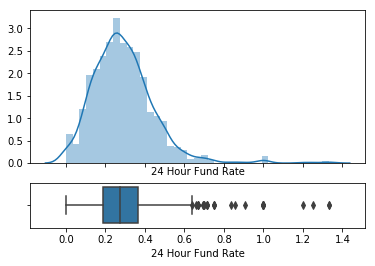

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})

# Add a graph in each part
sns.boxplot(oneDayFundRate['24 Hour Fund Rate'], ax=ax_box)
sns.distplot(oneDayFundRate['24 Hour Fund Rate'], ax=ax_hist)

# Remove x axis name for the boxplot
#ax_box.set(xlabel='')

**Eliminate Outliers**

Anything over 60%

In [ ]:
oneDayFundRate = oneDayFundRate[oneDayFundRate['24 Hour Fund Rate'] < 0.6]

[Text(0.5, 0, '')]

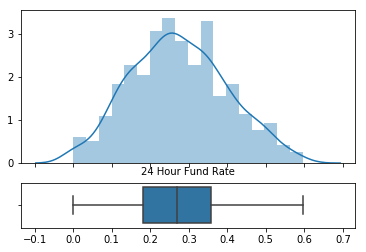

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(oneDayFundRate['24 Hour Fund Rate'], ax=ax_box)
sns.distplot(oneDayFundRate['24 Hour Fund Rate'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## ACH 

In [ ]:
ACH.describe()

,ACH %,Full App Approved %
count,1174.000000,1174.000000
mean,0.816939,0.629331
std,0.140249,0.131187
min,0.307692,0.241379
25%,0.733333,0.575055
50%,0.843750,0.628239
75%,0.925926,0.680556
max,1.000000,4.000000


**Visualize Data**

[Text(0.5, 0, '')]

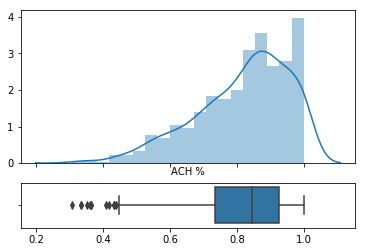

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.distplot(ACH['ACH %'], ax=ax_hist)
sns.boxplot(ACH['ACH %'], ax=ax_box)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
ACH = ACH[ACH['ACH %'] >= 0.6]

[Text(0.5, 0, '')]

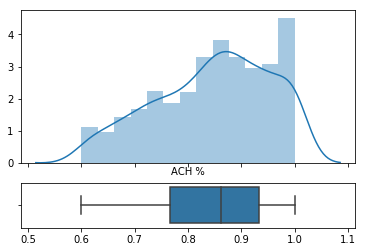

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.distplot(ACH['ACH %'], ax=ax_hist)
sns.boxplot(ACH['ACH %'], ax=ax_box)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## Effort 

In [ ]:
Effort.describe()

,Avg Effort Score,Full App Approved %
count,1186.000000,1186.000000
mean,286.381858,0.624650
std,68.723830,0.143485
min,0.000000,0.000000
25%,248.995353,0.572492
50%,283.556748,0.627660
75%,323.473948,0.680556
max,667.282639,4.000000


**Visualize Data**

[Text(0.5, 0, '')]

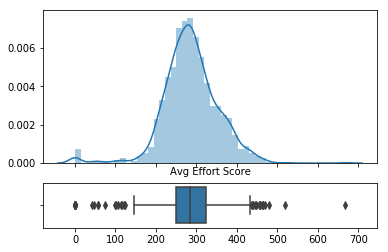

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(Effort['Avg Effort Score'], ax=ax_box)
sns.distplot(Effort['Avg Effort Score'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
Effort = Effort[(Effort['Avg Effort Score'] > 150) & (Effort['Avg Effort Score'] <= 450)]

[Text(0.5, 0, '')]

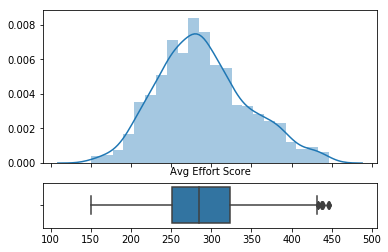

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(Effort['Avg Effort Score'], ax=ax_box)
sns.distplot(Effort['Avg Effort Score'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## CoApp 

In [ ]:
CoApp.describe()

,Co-App %
count,1186.000000
mean,0.327616
std,0.080248
min,0.000000
25%,0.279559
50%,0.323669
75%,0.372279
max,1.000000


**Visualize Data**

[Text(0.5, 0, '')]

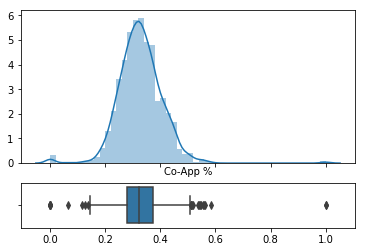

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(CoApp['Co-App %'], ax=ax_box)
sns.distplot(CoApp['Co-App %'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
CoApp = CoApp[(CoApp['Co-App %'] >= 0.2) & (CoApp['Co-App %'] <= 0.5)]

[Text(0.5, 0, '')]

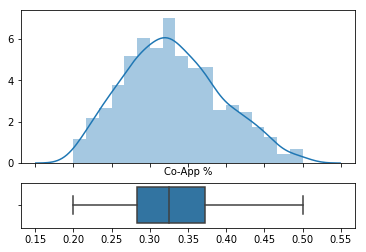

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(CoApp['Co-App %'], ax=ax_box)
sns.distplot(CoApp['Co-App %'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## FAS 

In [ ]:
FAS.describe()

,FAS%,Full App Approved %
count,1185.000000,1185.000000
mean,0.269242,0.625177
std,0.083491,0.142392
min,0.052632,0.000000
25%,0.232143,0.572727
50%,0.262295,0.627660
75%,0.295082,0.680556
max,2.000000,4.000000


**Visualize Data**

[Text(0.5, 0, '')]

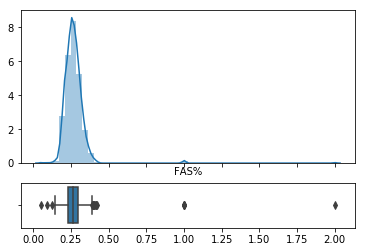

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FAS['FAS%'], ax=ax_box)
sns.distplot(FAS['FAS%'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Extreme Outliers**

In [ ]:
FAS = FAS[(FAS['FAS%'] > 0) & (FAS['FAS%'] < 0.75)]

[Text(0.5, 0, '')]

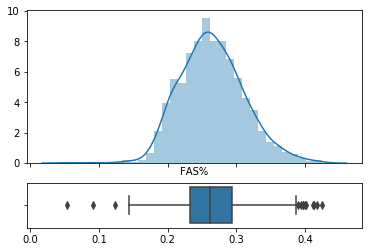

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FAS['FAS%'], ax=ax_box)
sns.distplot(FAS['FAS%'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
FAS = FAS[(FAS['FAS%'] >= 0.15) & (FAS['FAS%'] < 0.39)]

[Text(0.5, 0, '')]

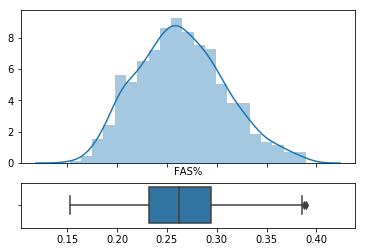

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FAS['FAS%'], ax=ax_box)
sns.distplot(FAS['FAS%'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## FullApprove

In [ ]:
FullApprove.describe()

,Full App Approved %
count,1186.000000
mean,0.624650
std,0.143485
min,0.000000
25%,0.572492
50%,0.627660
75%,0.680556
max,4.000000


**Visualize Data**

[Text(0.5, 0, '')]

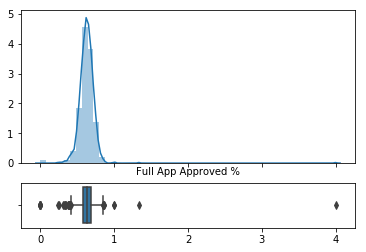

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FullApprove['Full App Approved %'], ax=ax_box)
sns.distplot(FullApprove['Full App Approved %'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Extreme Outliers**

In [ ]:
FullApprove = FullApprove[(FullApprove['Full App Approved %'] > 0) & (FullApprove['Full App Approved %'] < 1)]

[Text(0.5, 0, '')]

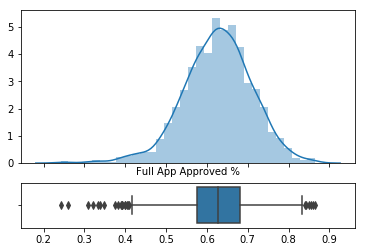

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FullApprove['Full App Approved %'], ax=ax_box)
sns.distplot(FullApprove['Full App Approved %'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
FullApprove = FullApprove[(FullApprove['Full App Approved %'] >= 0.41) & (FullApprove['Full App Approved %'] <= 0.81)]

[Text(0.5, 0, '')]

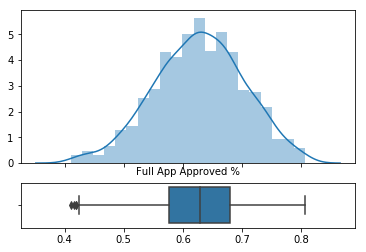

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FullApprove['Full App Approved %'], ax=ax_box)
sns.distplot(FullApprove['Full App Approved %'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## FundRate 

In [ ]:
FundRate.describe()

,Full App Approved %,Fund Rate
count,1185.000000,1185.000000
mean,0.625177,0.082772
std,0.142392,0.028623
min,0.000000,0.000000
25%,0.572727,0.064133
50%,0.627660,0.081967
75%,0.680556,0.099476
max,4.000000,0.197309


**Visualize Data**

[Text(0.5, 0, '')]

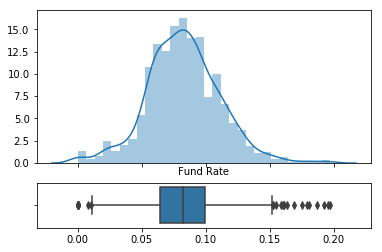

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FundRate['Fund Rate'], ax=ax_box)
sns.distplot(FundRate['Fund Rate'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
FundRate = FundRate[(FundRate['Fund Rate'] > 0.02) & (FundRate['Fund Rate'] < 0.19)]

[Text(0.5, 0, '')]

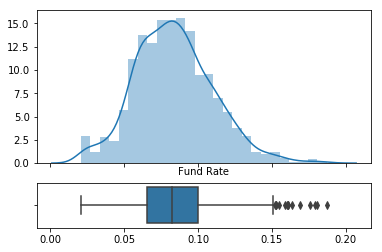

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(FundRate['Fund Rate'], ax=ax_box)
sns.distplot(FundRate['Fund Rate'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## LoansFunded 

In [ ]:
LoansFunded.describe()

,Applications Funded,Full App Approved %
count,1186.000000,1186.000000
mean,30.146712,0.624650
std,12.647058,0.143485
min,0.000000,0.000000
25%,24.000000,0.572492
50%,30.000000,0.627660
75%,37.000000,0.680556
max,104.000000,4.000000


**Visualize Data**

[Text(0.5, 0, '')]

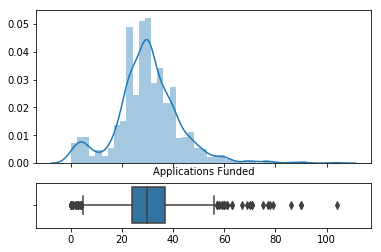

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(LoansFunded['Applications Funded'], ax=ax_box)
sns.distplot(LoansFunded['Applications Funded'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
LoansFunded = LoansFunded[(LoansFunded['Applications Funded'] > 10) & (LoansFunded['Applications Funded'] <= 50)]

[Text(0.5, 0, '')]

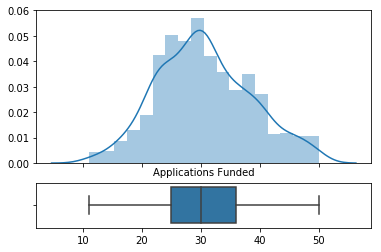

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(LoansFunded['Applications Funded'], ax=ax_box)
sns.distplot(LoansFunded['Applications Funded'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## PullThrough 

In [ ]:
PullThrough.describe()

,Full App Approved %,Pull Through Rate
count,1176.000000,1176.000000
mean,0.629961,0.497089
std,0.131963,0.112966
min,0.241379,0.000000
25%,0.575166,0.432432
50%,0.628796,0.500000
75%,0.680672,0.564103
max,4.000000,1.333333


**Visualize Data**

[Text(0.5, 0, '')]

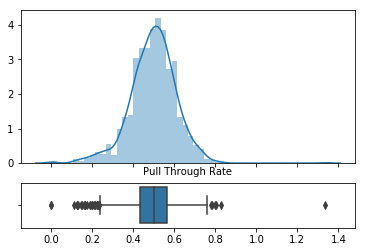

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(PullThrough['Pull Through Rate'], ax=ax_box)
sns.distplot(PullThrough['Pull Through Rate'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Eliminate Outliers**

In [ ]:
PullThrough = PullThrough[(PullThrough['Pull Through Rate'] >= 0.23) & (PullThrough['Pull Through Rate'] < 0.75)]

[Text(0.5, 0, '')]

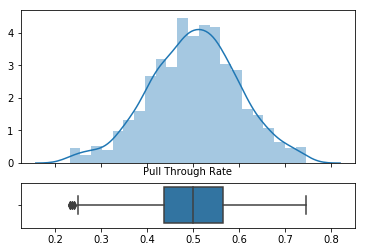

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})
 
# Add a graph in each part
sns.boxplot(PullThrough['Pull Through Rate'], ax=ax_box)
sns.distplot(PullThrough['Pull Through Rate'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Final Metrics

In [ ]:
# put all the updated datafiles into object (list)
files1 = [oneDayFundRate, ACH, Effort , CoApp, FAS, FullApprove, FundRate, LoansFunded, PullThrough]

# combine ALL the datasets
#final_data = reduce(lambda left, right: pd.merge(left, right, on= ['Loan Officer Name', 'Month of effective_date']), files)

# since the datasets are different sizes we need to designate this as an outer join
final_data = reduce(lambda left, right: pd.merge(left, right, on= ['Loan Officer Name', 'Month of effective_date'], how = 'outer'), files1)

**Calculate Metrics**

In [ ]:
# calculate median
final_metrics = pd.DataFrame(final_data.select_dtypes(exclude=['object']).apply(np.nanmedian, axis=0))
final_metrics.columns = ['Median']

# calculate standard deviation
final_metrics['Stdev'] = final_data.select_dtypes(exclude=['object']).apply(np.nanstd, axis=0)

# get lower bound and upper bounds for each metric (2 times the standard deviation)
final_metrics['LowerBound'] = final_metrics['Median'] - (final_metrics['Stdev'] * 2)
final_metrics['UpperBound'] = final_metrics['Median'] + (final_metrics['Stdev'] * 2)

# view data
final_metrics

,Median,Stdev,LowerBound,UpperBound
24 Hour Fund Rate,0.268293,0.125017,0.018258,0.518327
ACH %,0.861111,0.108269,0.644574,1.077648
Avg Effort Score,284.156667,56.279857,171.596954,396.716380
Co-App %,0.324838,0.063261,0.198315,0.451360
FAS%,0.261755,0.043890,0.173975,0.349535
Full App Approved %,0.629213,0.075643,0.477927,0.780500
Fund Rate,0.082447,0.026388,0.029670,0.135224
Applications Funded,30.000000,7.967548,14.064903,45.935097
Pull Through Rate,0.500000,0.096844,0.306312,0.693688


## Compare to data without filtering

In [ ]:
# calculate median
final_metrics1 = pd.DataFrame(full_data.select_dtypes(exclude=['object']).apply(np.nanmedian, axis=0))
final_metrics1.columns = ['Median']

# calculate standard deviation
final_metrics1['Stdev'] = full_data.select_dtypes(exclude=['object']).apply(np.nanstd, axis=0)

# get lower bound and upper bounds for each metric (2 times the standard deviation)
final_metrics1['LowerBound'] = final_metrics1['Median'] - (final_metrics1['Stdev'] * 2)
final_metrics1['UpperBound'] = final_metrics1['Median'] + (final_metrics1['Stdev'] * 2)

# view data
final_metrics1

,Median,Stdev,LowerBound,UpperBound
24 Hour Fund Rate,0.272727,0.159012,-0.045297,0.590751
ACH %,0.843750,0.140189,0.563372,1.124128
Avg Effort Score,271.129167,122.923721,25.281724,516.976610
Co-App %,0.323669,0.080215,0.163240,0.484099
FAS%,0.261755,0.086341,0.089073,0.434436
Full App Approved %,0.627660,0.143424,0.340811,0.914508
Fund Rate,0.081645,0.029388,0.022869,0.140420
Applications Funded,28.000000,16.046708,-4.093415,60.093415
Pull Through Rate,0.500000,0.112918,0.274163,0.725837
